In [1]:
%load_ext autoreload
%autoreload

## This expands a notebook to full width
from IPython.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("""<style>div.output_area{max-height:10000px;overflow:scroll;}</style>"""))
## Show Python Version
import sys
print("Python: {0}".format(sys.version))

## Show Current Time
import datetime as dt
start = dt.datetime.now()
print("Notebook Last Run Initiated: "+str(start))

Python: 3.10.9 | packaged by conda-forge | (main, Jan 11 2023, 15:15:40) [MSC v.1916 64 bit (AMD64)]
Notebook Last Run Initiated: 2023-03-13 22:04:26.911195


In [2]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
seed = 42

import pandas as pd
import numpy as np

import sklearn.metrics as sklearn_metrics

np.random.seed(seed)

In [4]:
def silhouette_score(X, labels):
    """Wrapper function of Scikit-learn's silhouette_score. The only difference is it doesn't throw an error where there is only one label."""
  
    if len(set(labels)) == 1:
        return float("NaN")
    else:
        return sklearn_metrics.silhouette_score(X, labels)

In [5]:
data = pd.read_csv('data/project_dataset.csv',low_memory=False)

In [6]:
data.head()

,accountid,userid,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,B24CB6E7-C8E1-4B8D-9778-B724F67E05B2,64841C33-4A5A-4E8C-BB61-BDD70F326E90,-0.223028,0.168989,0.049634,0.265127,-0.099026,0.110539,0.082398,-0.217806,...,-0.224249,0.070055,-0.127531,0.008462,-0.093481,0.226089,-0.084671,0.017221,0.055065,0.239656
1,F51FC1D9-5D37-4D34-AB54-1F41B9BD8C06,F51FC1D9-5D37-4D34-AB54-1F41B9BD8C06,0.089386,-0.060354,0.026696,-0.238734,-0.059884,0.076348,0.078483,0.028509,...,-0.303863,-0.161484,-0.200358,0.231355,-0.184201,0.320125,-0.070762,0.033571,-0.058809,0.018938
2,2036E661-F89B-46CA-AD81-1AD78CA8C91E,913AEF55-040B-4F53-BA0A-7F136B4368F6,-0.133327,-0.076570,-0.103270,-0.255172,-0.033821,0.102381,0.228990,0.050512,...,-0.255370,0.289543,-0.361428,0.190217,-0.069958,0.388427,-0.105673,0.161997,-0.003599,0.293151
3,565A44C3-7F0A-4F50-89AA-7E296917B8FF,7584C122-1E64-47E8-B587-F466A39FD7D4,-0.137795,0.058056,-0.039041,0.080276,-0.143586,0.257206,0.243565,-0.017286,...,-0.175256,0.143120,-0.235421,0.258802,-0.124529,0.066114,0.008330,-0.010956,-0.173204,0.112793
4,677AEC7D-BC45-4D29-B116-3758EA2D15CB,4C70B81B-2A69-4708-A7CE-C1BBCC03E043,-0.038019,-0.021056,0.143451,0.090723,0.119178,0.086459,0.210279,-0.043040,...,-0.359738,0.062531,-0.251169,0.145347,0.003361,0.111164,0.015142,0.046343,-0.132209,0.216785


In [7]:
# find optimal K using silhouette scores
silhouette_scores = []

K = range(2,10)
for n_clusters in K:
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init=20, max_iter=500)
    kmeans.fit(data.iloc[:,2:])
    silhouette_scores.append(silhouette_score(data.iloc[:,2:], kmeans.labels_))    

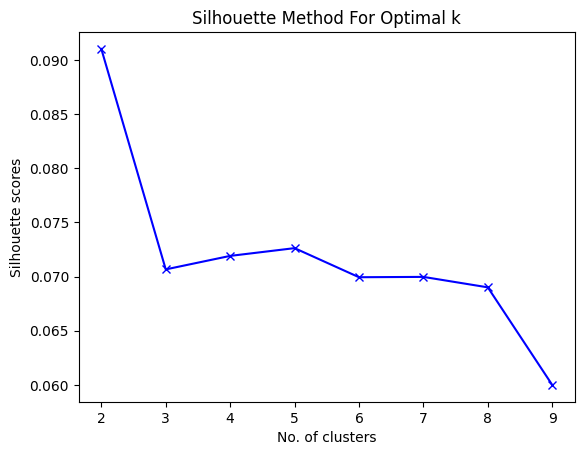

In [8]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [9]:
best_k = np.nanargmax(silhouette_scores)+2

In [10]:
print("The best K value for silhouette method is:",best_k)

The best K value for silhouette method is: 2


In [11]:
kmeans = KMeans(n_clusters=best_k, random_state=seed, n_init=20, max_iter=500).fit(data.iloc[:,2:])

In [12]:
clustered_data = data.loc[:,['accountid','userid']]

In [13]:
clustered_data['cluster'] = pd.Categorical(kmeans.labels_)

In [14]:
clustered_data.to_csv('data/cluster_index_KMeans.csv',index=False)

In [15]:
kmeans.cluster_centers_.tofile('data/kmeans_centroids.csv',sep=',')

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [17]:
cols = [*range(300)]
cols = map(str, cols)
cols = list(cols)
cols = map(lambda c : 'col'+c,cols)
cols = list(cols)

In [18]:
centroids.columns=cols

In [19]:
centroids.to_csv('data/kmeans_centroids.csv',index=False)